# Beam Propagation Method (BPM)

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

import matplotlib.cm as cm


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [14, 5]
rcParams['figure.dpi'] = 250


## BPM

In [3]:
x0 = np.linspace(-500*um, 500*um, 1024*4)
z0 = np.linspace(-0.1 * mm, 1.25*mm, 1024*2)
wavelength = 5 * um


In [4]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)


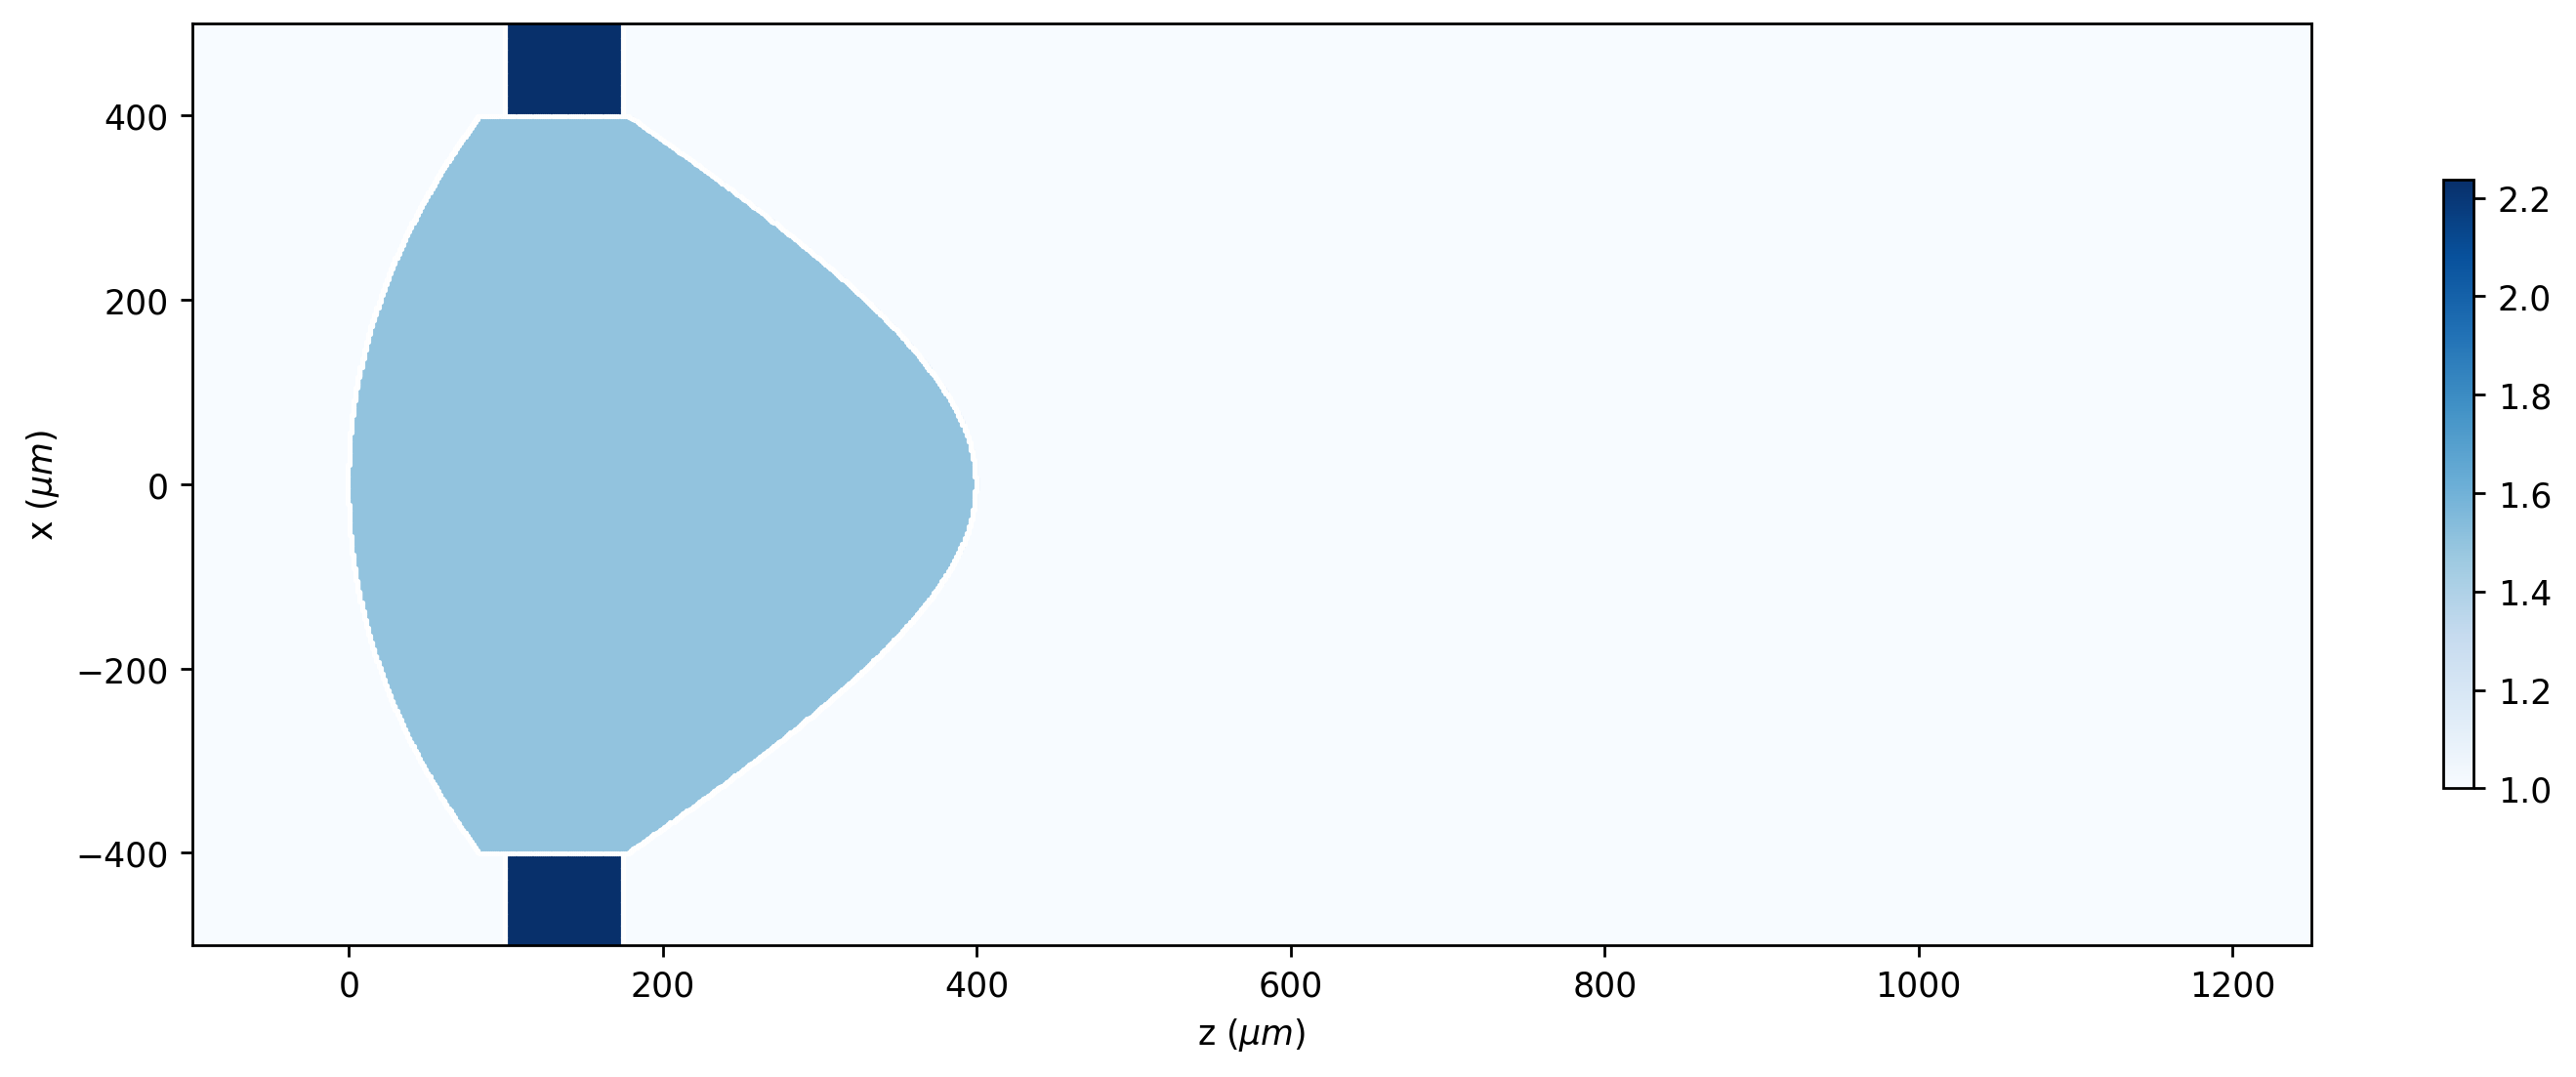

In [5]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds = lens.aspheric_lens(r0=(0*mm, 0*mm), angle=(0*degrees, (0*mm, 0*mm)),
                                  refraction_index=1.5,
                                  cx=(1/(1*mm), -1/(.25*mm)), Qx=(0, 0),
                                  a2=(0, 1e-13), a3=(0, 0), a4=(0, 0),
                                  depth=.4*mm, size=0.8*mm)

lens.slit(r0=(0, 100*um),
          aperture=800*um,
          depth=75*um,
          refraction_index=1+2j)


lens.draw_refraction_index(draw_borders=True, min_incr=0.01, colormap_kind=cm.Blues, colorbar_kind='vertical')


In [6]:
lens.filter_refraction_index(type_filter=2, pixels_filtering=25)


In [7]:
lens.incident_field(u0)


In [8]:
%%time
lens.clear_field()
lens.BPM(verbose=False)
lens.normalize()


CPU times: user 1.12 s, sys: 113 ms, total: 1.23 s
Wall time: 1.23 s


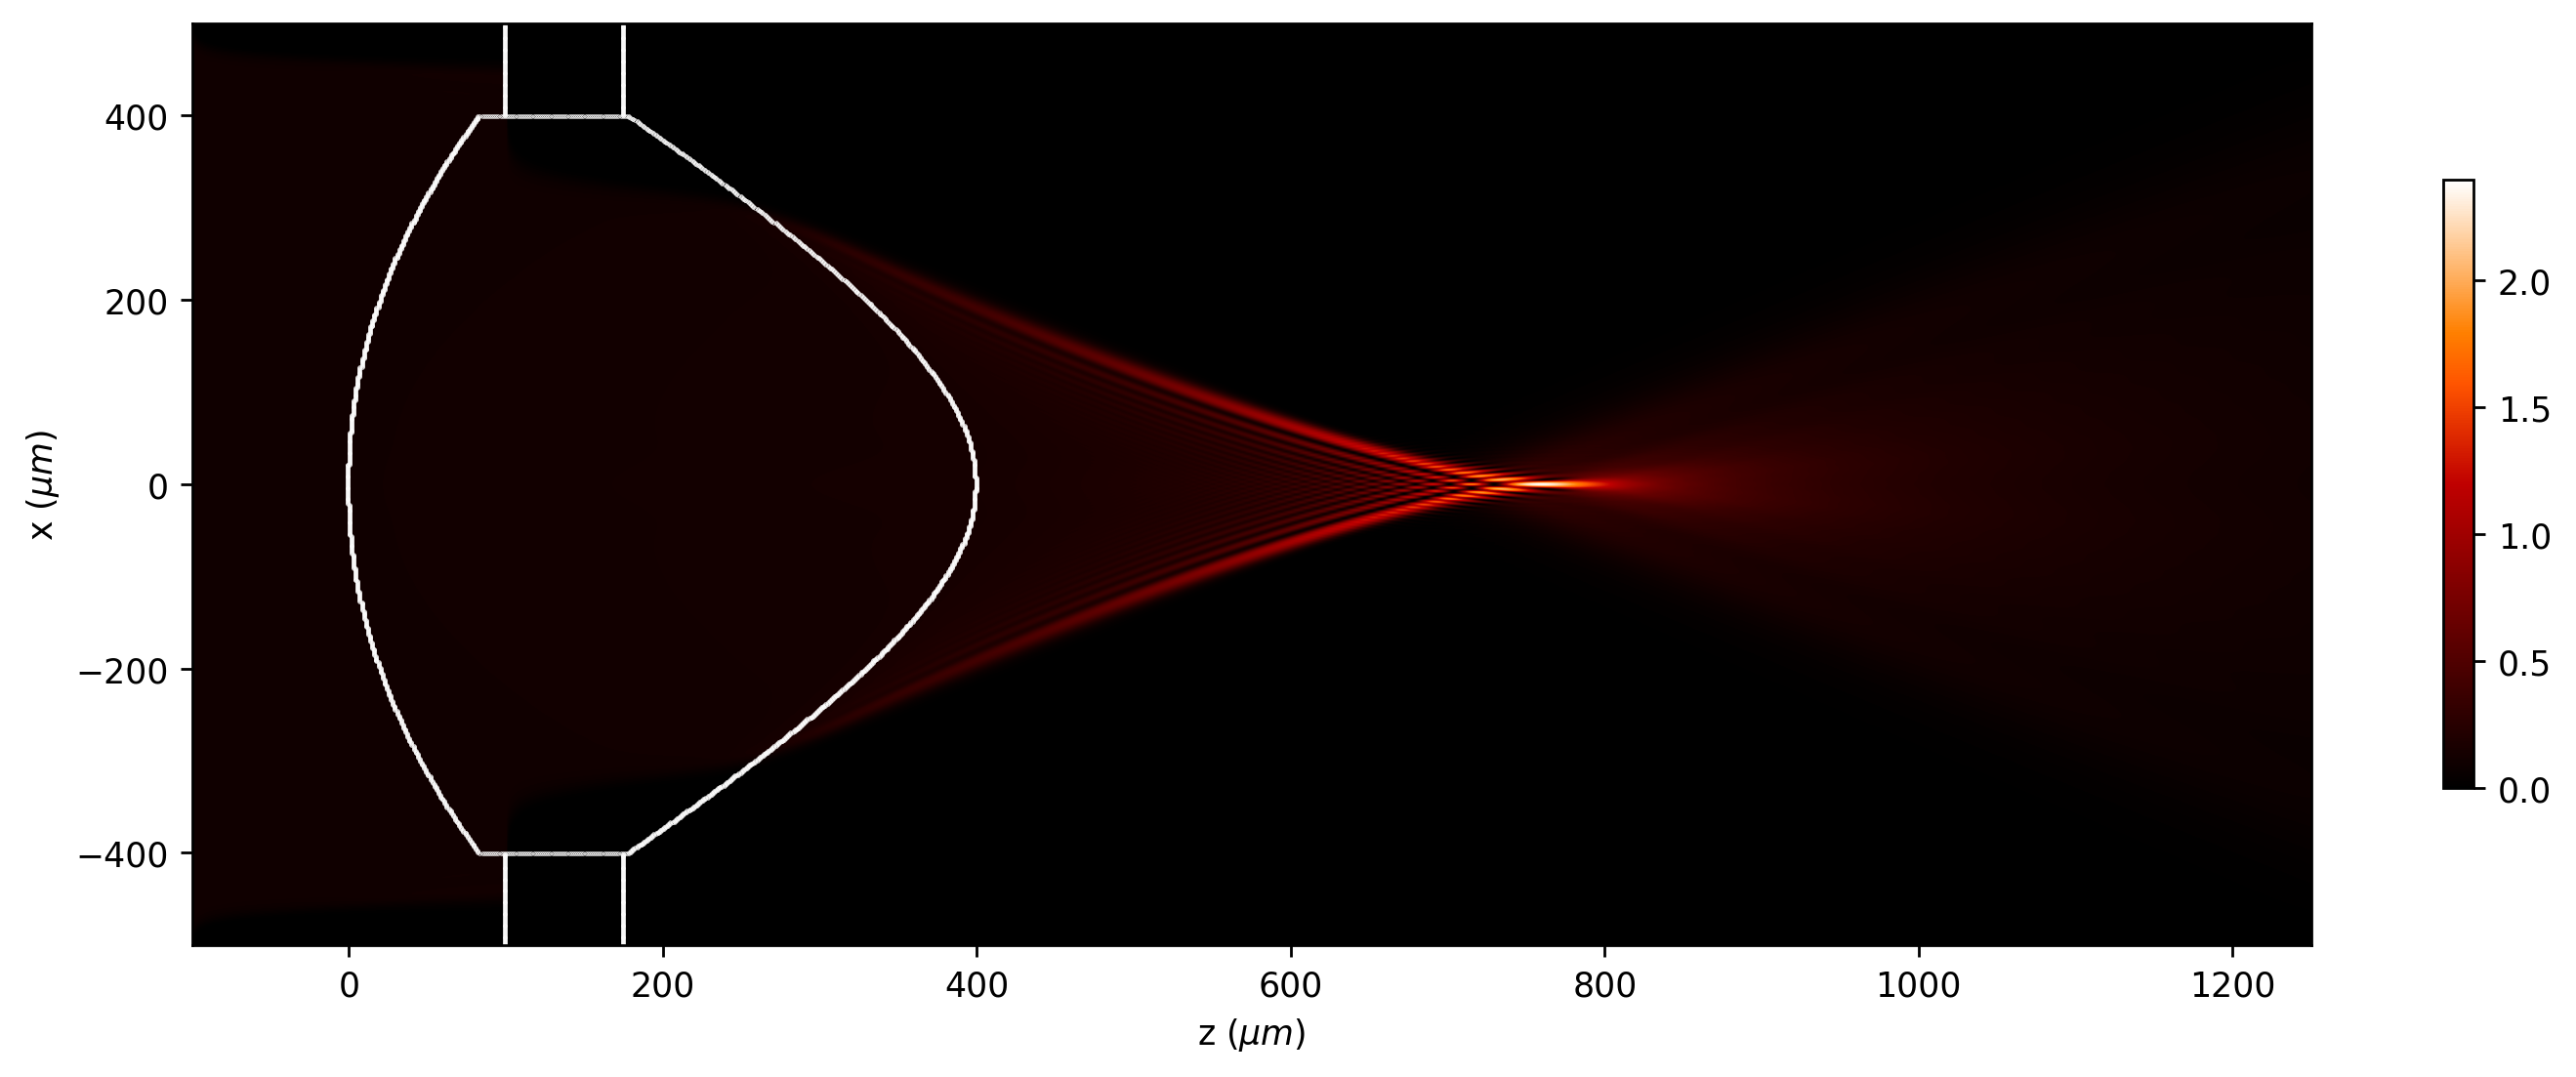

In [9]:
lens.draw(kind='intensity', logarithm=1e1, normalize=None, draw_borders=True, colorbar_kind='vertical')


In [10]:
Intensity_BPM = lens.intensity()


### Focusing area

In [11]:
x_f_bpm, z_f_bpm = lens.search_focus()


x = -0.122 um, z = 758.671 um


In [12]:
ylim_max = 20*um
zlim_max = 100*um


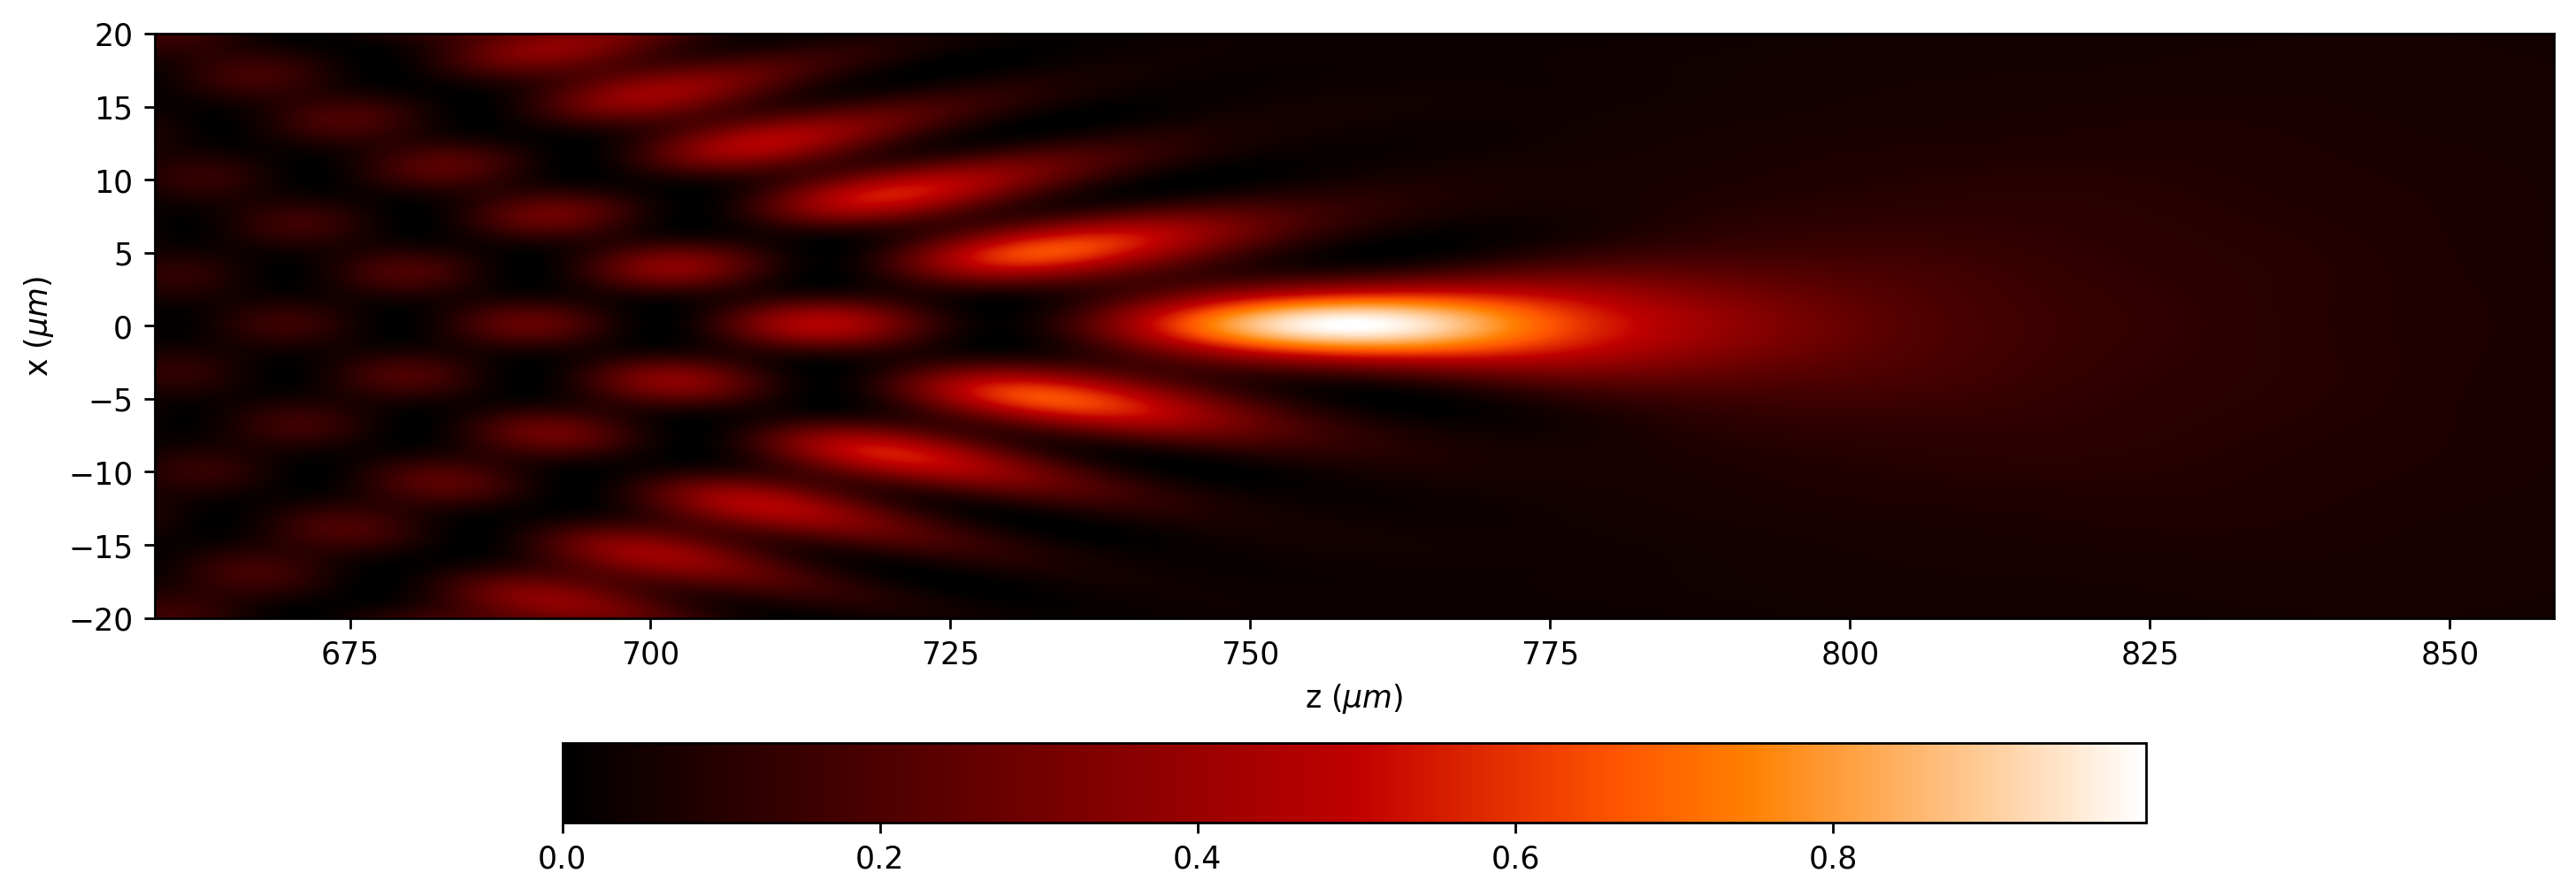

In [13]:
lens.draw(kind='intensity',  colorbar_kind='horizontal')

plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f_bpm-zlim_max,z_f_bpm+zlim_max);

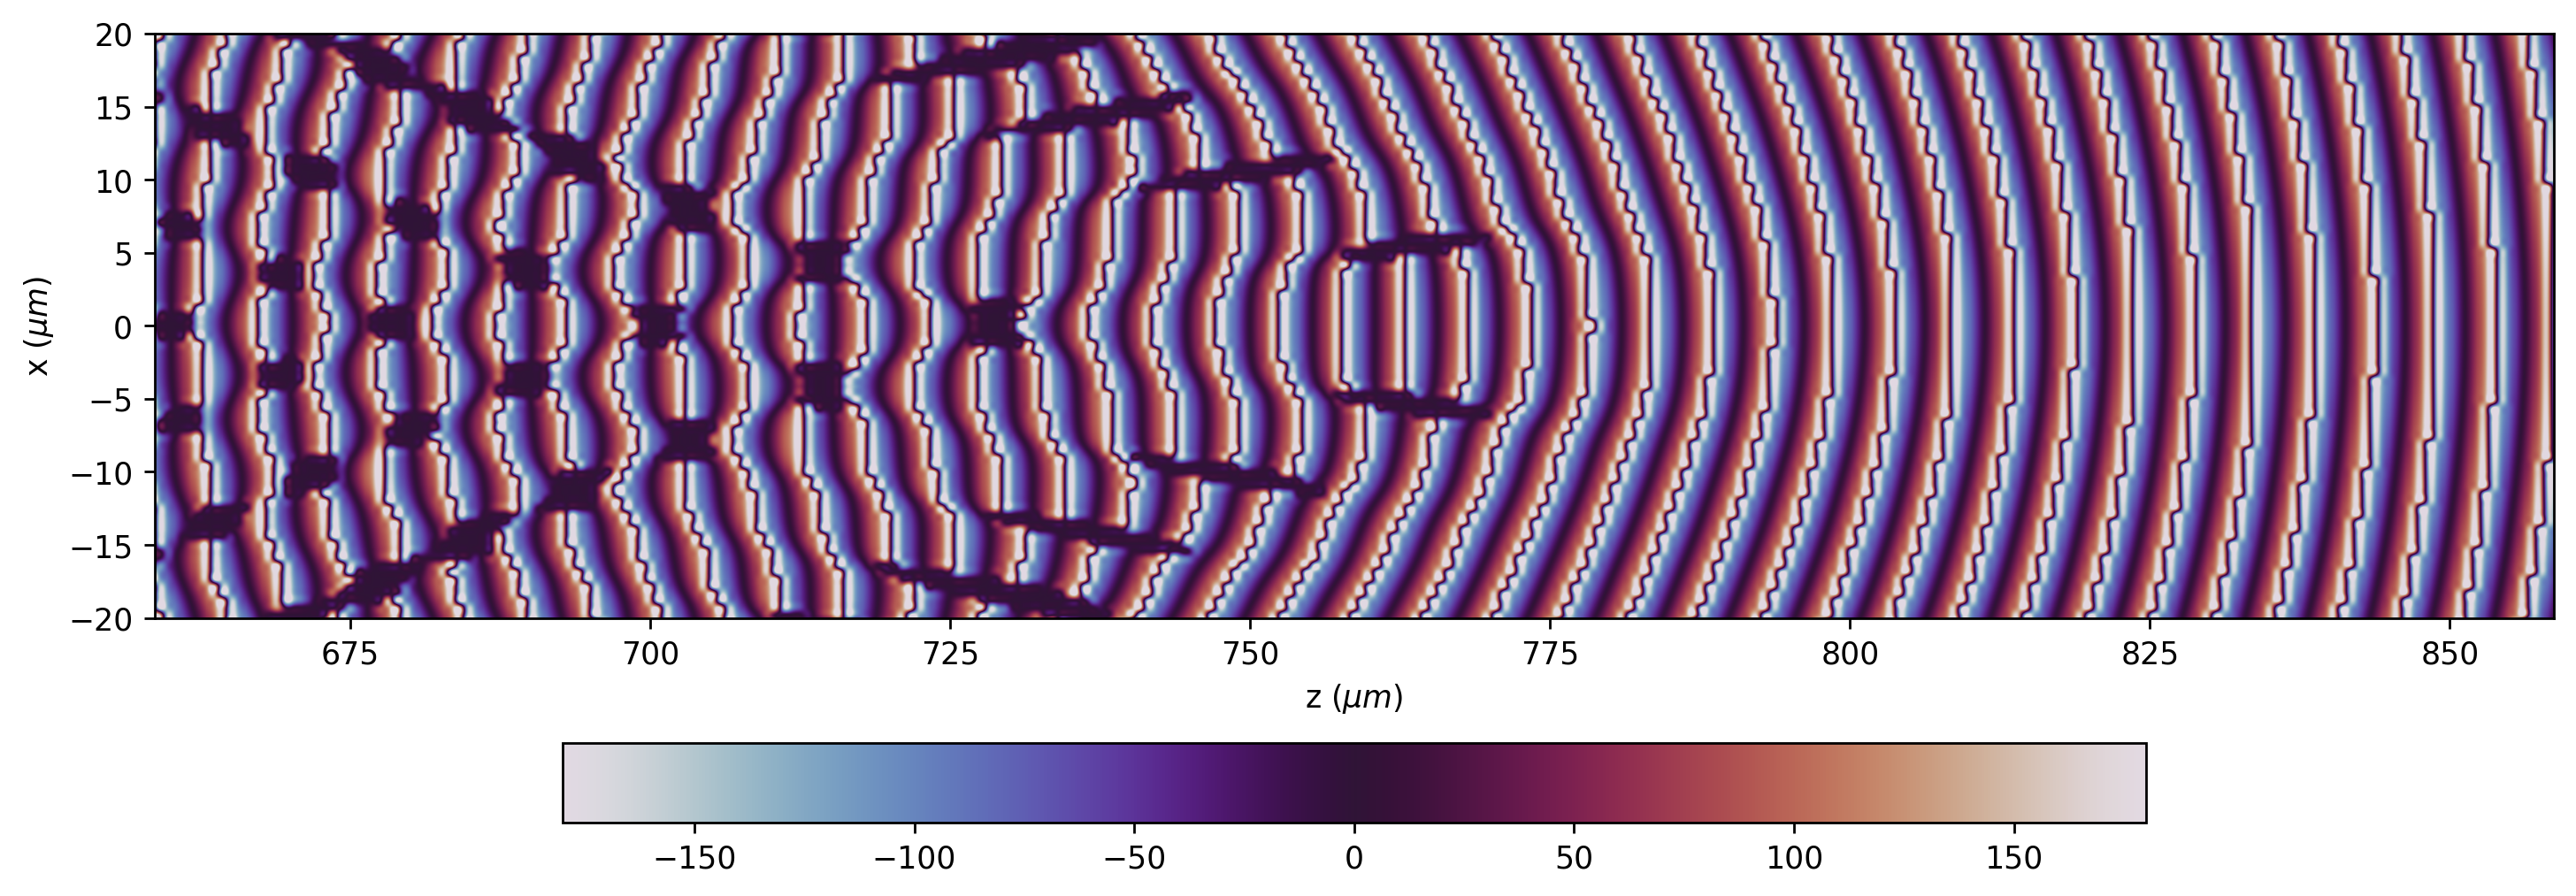

In [14]:
lens.draw(kind='phase', colorbar_kind='horizontal', percentage_intensity=0.02)

plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f_bpm-zlim_max,z_f_bpm+zlim_max);